In [1]:
#import python packages
import scanpy as sc
import scanorama
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
#r housekeeping
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 8.3.1
anndata2ri          1.0.1
annoy               NA
appnope             0.1.0
backcall            0.2.0
brotli              NA
cairo               1.19.1
certifi             2021.05.30
cffi                1.14.0
chardet             3.0.4
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
defusedxml          0.6.0
fbpca               NA
get_version

In [3]:
adataANT2d = sc.read('/Users/ann/2021/adata_h5ad/adata1_QC_N_UMAP.h5ad')
adataANT6w = sc.read('/Users/ann/2021/adata_h5ad/adata2_QC_N_UMAP.h5ad')
adataANTsi2d = sc.read('/Users/ann/2021/adata_h5ad/adata3_QC_N_UMAP.h5ad')
adataANTsi3w = sc.read('/Users/ann/2021/adata_h5ad/adata4_QC_N_UMAP.h5ad')
adataWT = sc.read('/Users/ann/2021/adata_h5ad/adata5_QC_N_UMAP.h5ad')
adataR1 = sc.read('/Users/ann/2021/adata_h5ad/adata6_QC_N_UMAP.h5ad')
adataR2 = sc.read('/Users/ann/2021/adata_h5ad/adata7_QC_N_UMAP.h5ad')
adataR3 = sc.read('/Users/ann/2021/adata_h5ad/adata8_QC_N_UMAP.h5ad')
adataMG = sc.read('/Users/ann/2021/adata_h5ad/adata9_QC_N_UMAP.h5ad')
adataMic = sc.read('/Users/ann/2021/adata_h5ad/adata10_QC_N_UMAP.h5ad')


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:794: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  value_idx = self._prep_dim_index(value.index, attr)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:28)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2000
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:56)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [
... storing 'bimodel_counts' as categorical
... storing 'bimodel_genes' as categorical
... storing 'condition' as categorical
... storing 'dataset' as categorical
... storing 'louvain_r0.5' as categorical
... storing 'gene_id-0-0' as categorical
... storing 'gene_id-0-1-0' as categorical
... storing 'gene_id-1-1-0' as categorical
... storing 'gene_id-2-1-0' as categorical
... storing 'gene_id-2-0' as categorical
... storing 'gene_id-3-0' as categorical
... storing 'gene_id-0-2-0' as categorical
... storing 'gene_id-0-1-2-0' as categorical
... storing 'gene_id-1-1-2-0' as categorical
... storing 'gene_id-2-1-2-0' as categorical
... storing 'gene_id-2-2-0' as categorical
... storing 'gene_id-3-2-0' as categorical
... storing 'gene_id-0-1' as categorical


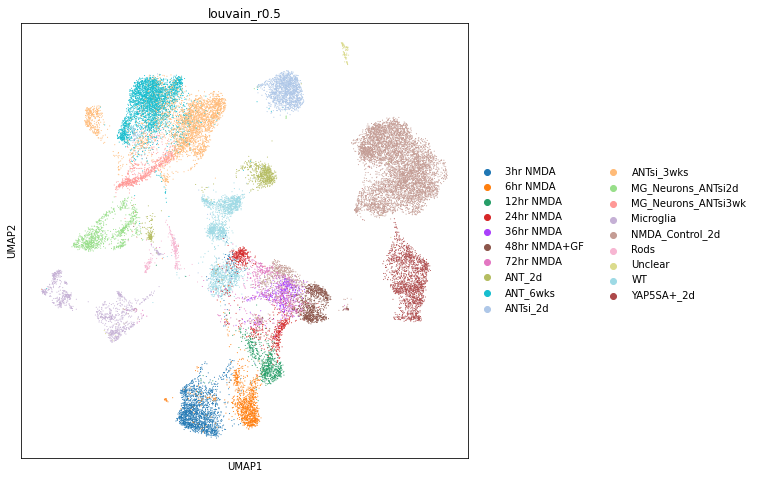

In [4]:
test = adataR3.concatenate(adataMic, adataMG, adataWT, adataANT2d, adataANT6w, adataANTsi2d, adataANTsi3w)
sc.pp.highly_variable_genes(test, flavor='cell_ranger', n_top_genes=2000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(test.var['highly_variable'])))
sc.pp.pca(test, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(test)
sc.tl.umap(test)
sc.pl.umap(test, color='louvain_r0.5')

In [5]:
adataH = adataMG.concatenate(adataMic)

adatas = [adataR3, adataH, adataWT, adataANT2d, adataANTsi2d, adataANTsi3w, adataANT6w]
scanorama.integrate_scanpy(adatas)
adata = adataR3.concatenate(adataH, adataWT, adataANT2d, adataANTsi2d, adataANTsi3w, adataANT6w)

adata_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_adata = np.concatenate(adata_int)
adata.obsm['Scanorama'] = all_adata

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:794: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  value_idx = self._prep_dim_index(value.index, attr)


Found 17006 genes among all datasets
[[0.         0.31120062 0.         0.00124224 0.00312256 0.00272869
  0.        ]
 [0.         0.         0.62285714 0.06086957 0.16549571 0.04733076
  0.01795005]
 [0.         0.         0.         0.72142857 0.14142857 0.00285714
  0.10285714]
 [0.         0.         0.         0.         0.57763975 0.03354037
  0.09068323]
 [0.         0.         0.         0.         0.         0.39539422
  0.13114754]
 [0.         0.         0.         0.         0.         0.
  0.34469303]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Processing datasets (2, 3)
Processing datasets (1, 2)
Processing datasets (3, 4)
Processing datasets (4, 5)
Processing datasets (5, 6)
Processing datasets (0, 1)
Processing datasets (1, 4)
Processing datasets (2, 4)
Processing datasets (4, 6)
Processing datasets (2, 6)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:794: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  value_idx = self._prep_dim_index(value.index, attr)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2000
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [
... storing 'bimodel_counts' as categorical
... storing 'bimodel_genes' as categorical
... storing 'condition' as categorical
... storing 'dataset' as categorical
... storing 'louvain_r0.5' as categorical
... storing 'gene_id-0-0' as categorical
... storing 'gene_id-0-1-0' as categorical
... storing 'gene_id-1-1-0' as categorical
... storing 'gene_id-2-1-0' as categorical
... storing 'gene_id-2-0' as categorical
... storing 'gene_id-3-0' as categorical
... storing 'gene_id-0-2-0' as categorical
... storing 'gene_id-0-1-2-0' as categorical
... storing 'gene_id-1-1-2-0' as categorical
... storing 'gene_id-2-1-2-0' as categorical
... storing 'gene_id-2-2-0' as categorical
... storing 'gene_id-3-2-0' as categorical
... storing 'gene_id-0-1' as categorical


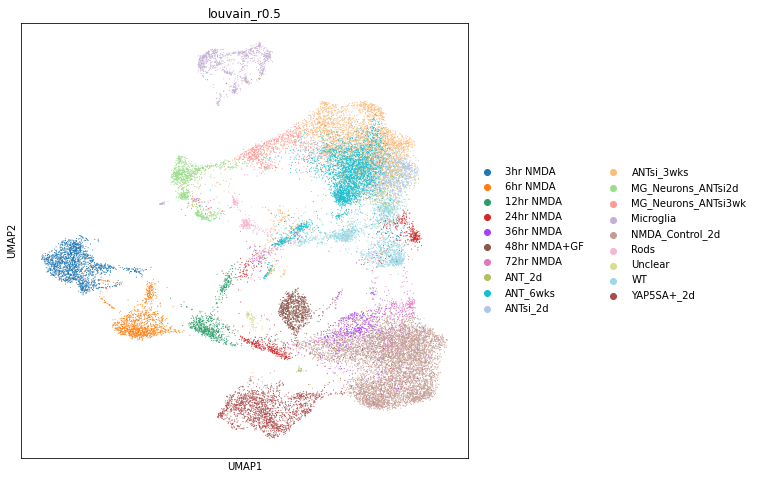

In [6]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata, use_rep = "Scanorama")
sc.tl.umap(adata)
sc.pl.umap(adata, color='louvain_r0.5')

In [7]:
#Define a nice colour map for gene expression
colors2 = plt.cm.gnuplot2(np.linspace(0.83, 0.1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [8]:
colorsCombDot = np.vstack([colors2])
mymapDot = colors.LinearSegmentedColormap.from_list('my_colormapDot', colorsCombDot)

In [9]:
adata.obs.rename(columns={'louvain_r0.5':'Treatments', 'dataset':'Datasets'}, inplace=True)
test.obs.rename(columns={'louvain_r0.5':'Treatments', 'dataset':'Datasets'}, inplace=True)
adata.obs['Datasets'].replace({'Rueda':'Rueda19', 'Jorstad21':'Jorstad20'}, inplace=True)
test.obs['Datasets'].replace({'Rueda':'Rueda19', 'Jorstad21':'Jorstad20'}, inplace=True)

test.obs['Treatments'].replace({'ANT_6wks':'ANT 6w', 'ANTsi_3wks':'ANTSi 3w', 'MG_Neurons_ANTsi3wk':'Neuron ANTSi3w', 'Neuron ANTsi3w':'Neuron ANTSi3w', 'MG_Neurons_ANTsi2d':'Neuron ANTSi2d', 'ANT_2d': 'ANT 2d', 'ANTsi_2d': 'ANTSi 2d', 'NMDA_Control_2d':'Control NMDA2d', '3hr NMDA':'NMDA 3h', '6hr NMDA':'NMDA 6h', '12hr NMDA': 'NMDA 12h', '24hr NMDA': 'NMDA 24h', '36hr NMDA': 'NMDA 36h', '48hr NMDA+GF': 'NMDA+GF 2d', '72hr NMDA':'NMDA 3d', 'NMDA 3d':'NMDA 72h','YAP5SA+_2d': 'YAP5SA+ 2d'}, inplace=True)
adata.obs['Treatments'].replace({'ANT_6wks':'ANT 6w', 'ANTsi_3wks':'ANTSi 3w', 'MG_Neurons_ANTsi3wk':'Neuron ANTSi3w', 'Neuron ANTsi3w':'Neuron ANTSi3w','MG_Neurons_ANTsi2d':'Neuron ANTSi2d', 'ANT_2d': 'ANT 2d', 'ANTsi_2d': 'ANTSi 2d', 'NMDA_Control_2d':'Control NMDA2d', '3hr NMDA':'NMDA 3h', '6hr NMDA':'NMDA 6h', '12hr NMDA': 'NMDA 12h', '24hr NMDA': 'NMDA 24h', '36hr NMDA': 'NMDA 36h', '48hr NMDA+GF': 'NMDA+GF 2d', '72hr NMDA':'NMDA 3d', 'NMDA 3d':'NMDA 72h','YAP5SA+_2d': 'YAP5SA+ 2d'}, inplace=True)

adata.obs['Treatments'].replace({'Unclear':'other', 'Rods':'other', 'Microglia':'other'}, inplace=True)
test.obs['Treatments'].replace({'Unclear':'other', 'Rods':'other', 'Microglia':'other'}, inplace=True)


... storing 'Datasets' as categorical
... storing 'Treatments' as categorical


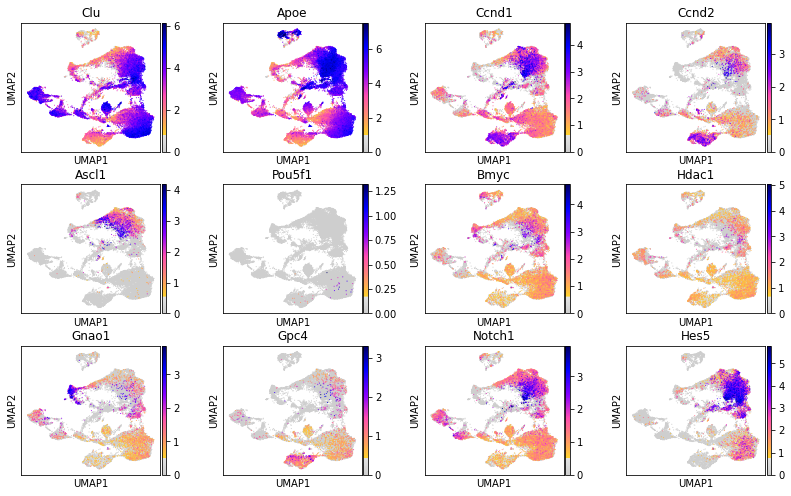

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


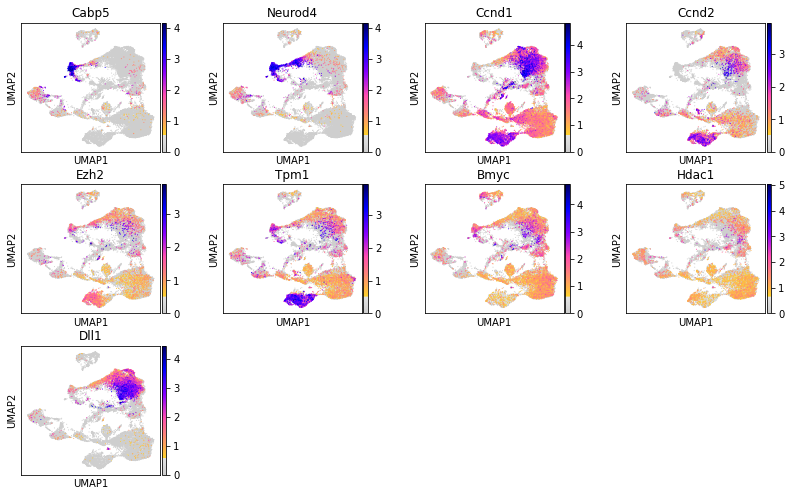

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


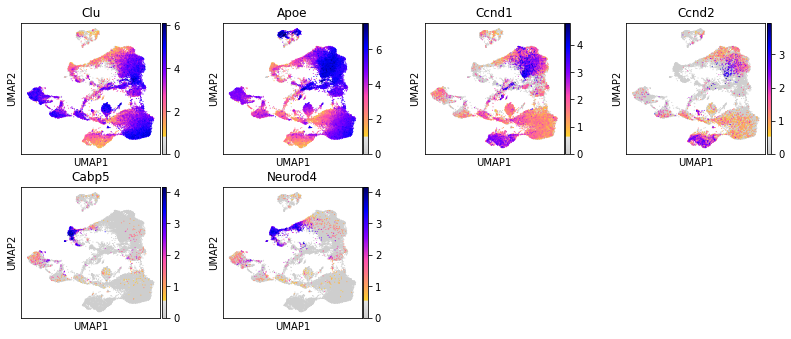

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


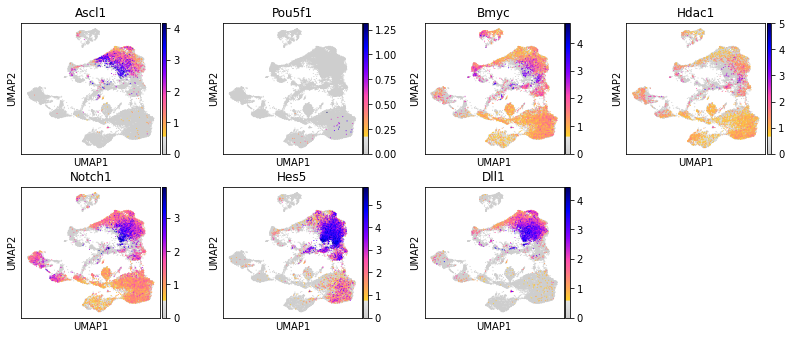

In [10]:
plt.rcParams['figure.figsize']=(2.5,2.5) #rescale figures

sc.pl.umap(adata, color = ['Clu', 'Apoe', 'Ccnd1' ,'Ccnd2', 'Ascl1', 'Pou5f1', 'Bmyc', 'Hdac1', 'Gnao1', 'Gpc4', 'Notch1', 'Hes5'], color_map = mymap, save = 'poster1')
sc.pl.umap(adata, color = ['Cabp5', 'Neurod4', 'Ccnd1' ,'Ccnd2', 'Ezh2', 'Tpm1', 'Bmyc', 'Hdac1', 'Dll1'], color_map = mymap, save = 'poster2')

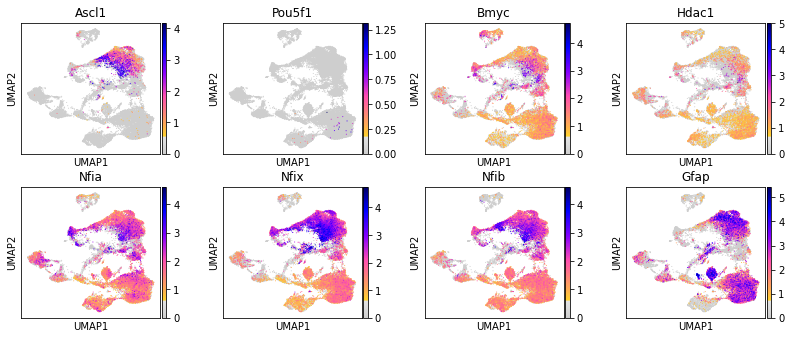

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


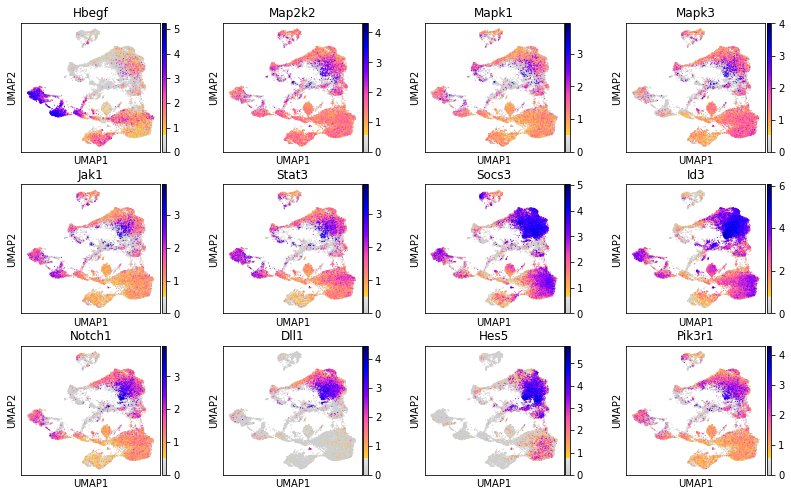

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


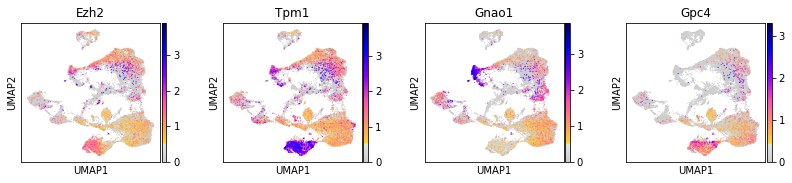

In [41]:
plt.rcParams['figure.figsize']=(2.5,2.5) #rescale figures

sc.pl.umap(adata, color = ['Ascl1', 'Pou5f1', 'Bmyc', 'Hdac1', 'Nfia', 'Nfix', 'Nfib', 'Gfap'], color_map = mymap, save = 'SCALE_NEW4_progenprolifregen.pdf')
sc.pl.umap(adata, color = ['Hbegf', 'Map2k2', 'Mapk1', 'Mapk3', 'Jak1', 'Stat3', 'Socs3', 'Id3', 'Notch1', 'Dll1', 'Hes5', 'Pik3r1', ], color_map = mymap, save = 'SCALE_NEW4_pathways.pdf')
sc.pl.umap(adata, color = ['Ezh2', 'Tpm1', 'Gnao1', 'Gpc4'], color_map = mymap, save = 'SCALE_NEW4_ezh2.pdf')

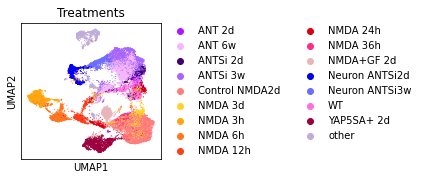

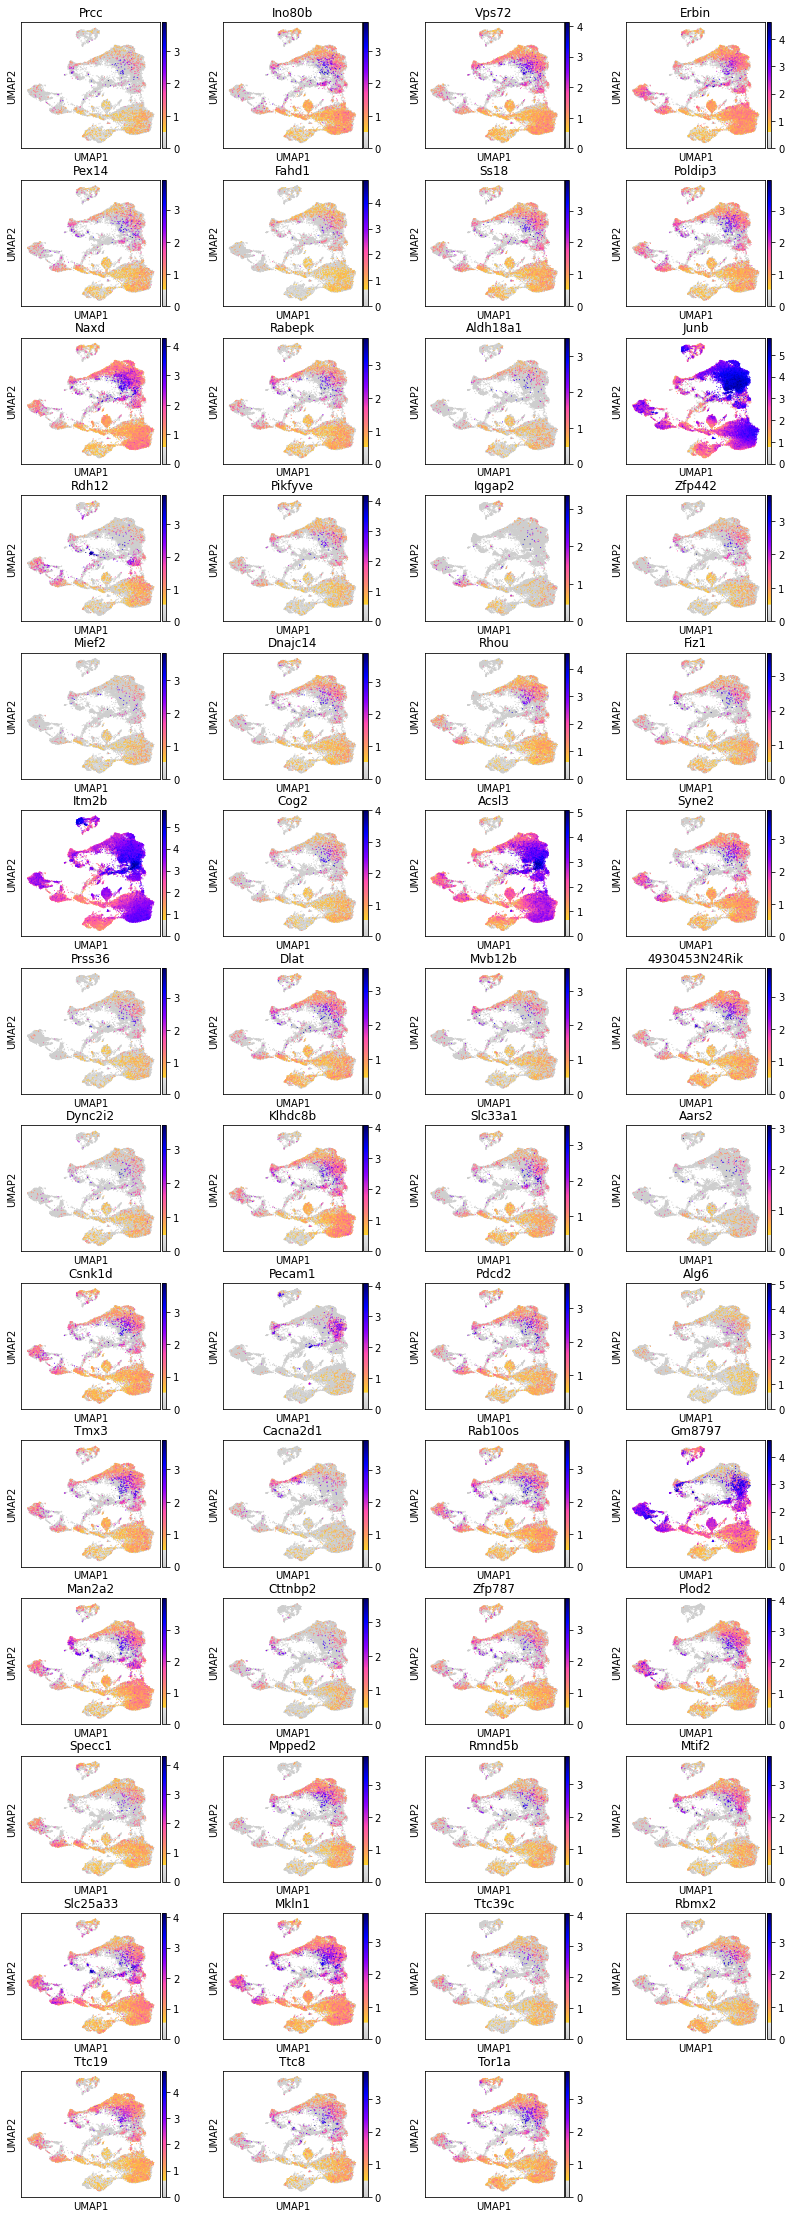

In [32]:
sc.pl.umap(adata, color = 'Treatments')
sc.pl.umap(adata, color = ['Prcc', 'Ino80b', 'Vps72', 'Erbin', 'Pex14', 'Fahd1', 'Ss18', 'Poldip3', 'Naxd', 'Rabepk', 'Aldh18a1', 'Junb', 'Rdh12', 'Pikfyve', 'Iqgap2', 'Zfp442', 'Mief2', 'Dnajc14', 'Rhou', 'Fiz1', 'Itm2b', 'Cog2', 'Acsl3', 'Syne2', 'Prss36', 'Dlat', 'Mvb12b', '4930453N24Rik', 'Dync2i2', 'Klhdc8b', 'Slc33a1', 'Aars2', 'Csnk1d', 'Pecam1', 'Pdcd2', 'Alg6', 'Tmx3', 'Cacna2d1', 'Rab10os', 'Gm8797', 'Man2a2', 'Cttnbp2', 'Zfp787', 'Plod2', 'Specc1', 'Mpped2', 'Rmnd5b', 'Mtif2', 'Slc25a33', 'Mkln1', 'Ttc39c', 'Rbmx2', 'Ttc19', 'Ttc8', 'Tor1a'], color_map = mymap)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


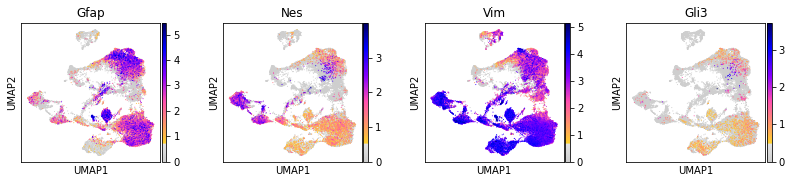

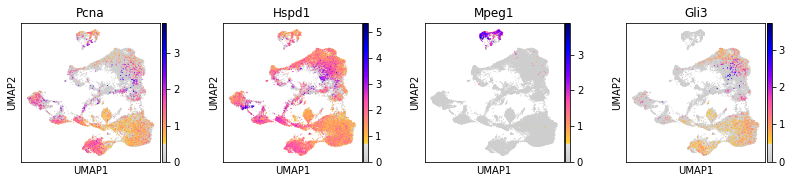

In [26]:
sc.pl.umap(adata, color = ['Gfap', 'Nes', 'Vim', 'Gli3'], color_map = mymap)
sc.pl.umap(adata, color = ['Pcna', 'Hspd1', 'Mpeg1', 'Gli3'], color_map = mymap)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


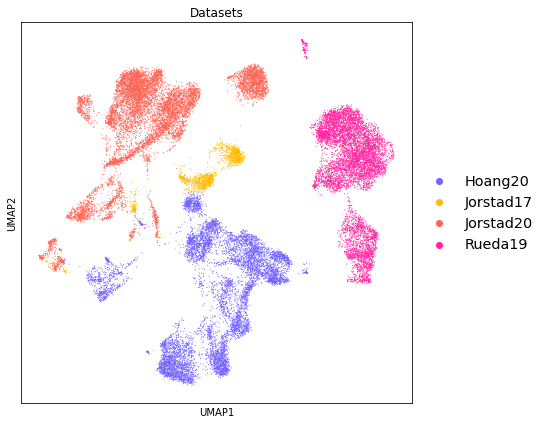

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


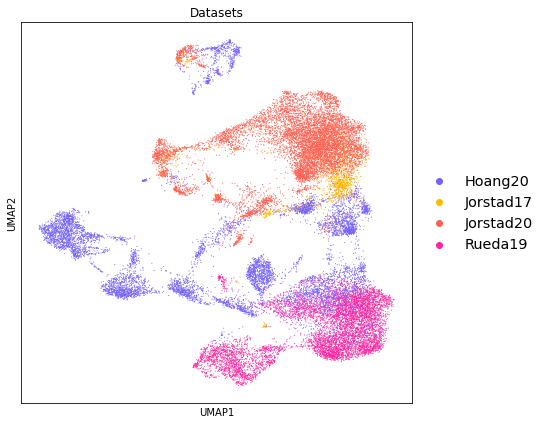

In [37]:
adata.obs['Datasets'].replace({'Rueda':'Rueda19', 'Jorstad21':'Jorstad20'}, inplace=True)
test.obs['Datasets'].replace({'Rueda':'Rueda19', 'Jorstad21':'Jorstad20'}, inplace=True)

plt.rcParams['figure.figsize']=(7,7)
sc.pl.umap(test, color = 'Datasets', palette = ['#7361ff', '#ffbb00', '#ff6254', '#ff24a0'], legend_fontsize = 'x-large', save = 'SCALE_NEW1nointdataset')
sc.pl.umap(adata, color = 'Datasets', palette = ['#7361ff', '#ffbb00', '#ff6254', '#ff24a0'], legend_fontsize = 'x-large', save = 'SCALE_NEW1dataset')


In [60]:
test.obs['Treatments'].replace({'ANT_6wks':'ANT 6w', 'ANTsi_3wks':'ANTSi 3w', 'MG_Neurons_ANTsi3wk':'Neuron ANTSi3w', 'Neuron ANTsi3w':'Neuron ANTSi3w', 'MG_Neurons_ANTsi2d':'Neuron ANTSi2d', 'ANT_2d': 'ANT 2d', 'ANTsi_2d': 'ANTSi 2d', 'NMDA_Control_2d':'Control NMDA2d', '3hr NMDA':'NMDA 3h', '6hr NMDA':'NMDA 6h', '12hr NMDA': 'NMDA 12h', '24hr NMDA': 'NMDA 24h', '36hr NMDA': 'NMDA 36h', '48hr NMDA+GF': 'NMDA+GF 2d', '72hr NMDA':'NMDA 3d', 'NMDA 3d':'NMDA 72h','YAP5SA+_2d': 'YAP5SA+ 2d'}, inplace=True)
adata.obs['Treatments'].replace({'ANT_6wks':'ANT 6w', 'ANTsi_3wks':'ANTSi 3w', 'MG_Neurons_ANTsi3wk':'Neuron ANTSi3w', 'Neuron ANTsi3w':'Neuron ANTSi3w','MG_Neurons_ANTsi2d':'Neuron ANTSi2d', 'ANT_2d': 'ANT 2d', 'ANTsi_2d': 'ANTSi 2d', 'NMDA_Control_2d':'Control NMDA2d', '3hr NMDA':'NMDA 3h', '6hr NMDA':'NMDA 6h', '12hr NMDA': 'NMDA 12h', '24hr NMDA': 'NMDA 24h', '36hr NMDA': 'NMDA 36h', '48hr NMDA+GF': 'NMDA+GF 2d', '72hr NMDA':'NMDA 3d', 'NMDA 3d':'NMDA 72h','YAP5SA+_2d': 'YAP5SA+ 2d'}, inplace=True)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


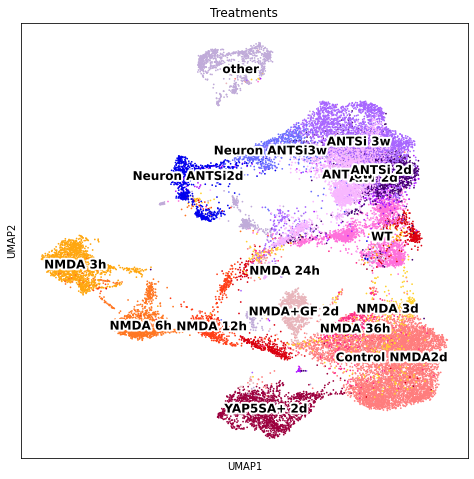

In [24]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures

sc.pl.umap(adata, color = 'Treatments', size=12, palette = ['#af19ff','#f8b8ff','#430070','#a866ff','#ff7d7d', '#ffd22e','#ffa70f','#ff7621','#ff3e17','#db000f','#ff2b84','#e8b5bb','#0000ed','#696eff', '#ff70db', '#9c003e', '#c0abd9'], legend_loc = 'on data', legend_fontoutline = 4, legend_fontsize = 'large',save = 'NEW1CellClustersLabeled')
sc.pl.umap(adata, color = 'Datasets', palette = ['#7361ff', '#ffbb00', '#ff6254', '#ff24a0'], legend_fontsize = 'x-large', save = 'SCALE_NEW1dataset')
sc.pl.umap(test, color = 'Treatments', size=12, palette = ['#af19ff','#f8b8ff','#430070','#a866ff','#ff7d7d', '#ffd22e','#ffa70f','#ff7621','#ff3e17','#db000f','#ff2b84','#e8b5bb','#0000ed','#696eff', '#ff70db', '#9c003e', '#c0abd9'], legend_loc = 'on data', legend_fontoutline = 4, legend_fontsize = 'large',save = 'SCALE_NEW1beforeIntegration')
sc.pl.umap(test, color = 'Datasets', palette = ['#7361ff', '#ffbb00', '#ff6254', '#ff24a0'], legend_fontsize = 'x-large', save = 'SCALE_NEW1nointdataset')


In [ ]:
#DNA methylation
sc.pl.umap(adata, color = ['Dnmt3l', 'Dnmt3a', 'Dnmt1'], color_map = mymap, save = 'DNAmethwriters.pdf')
sc.pl.umap(adata, color = ['Apobec1', 'Tet1', 'Tdg', 'Tet2', 'Tet3'], color_map = mymap, save = 'DNAmetherasers.pdf')
sc.pl.umap(adata, color = ['Zbtb33', 'Mbd5', 'Zbtb45', 'Mbd1', 'Setdb2', 'Mbd4', 'Setdb1', 'Mbd6', 'Zbtb38', 'Mbd2', 'Baz2a', 'Mbd2', 'Baz2a', 'Mbd3', 'Baz2b', 'Mecp2'], color_map = mymap, save = 'DNAmethreaders.pdf')


In [ ]:
#DNA methylation, edited
sc.pl.umap(adata, color = ['Dnmt3l', 'Dnmt3a', 'Dnmt1'], color_map = mymap, save = 'DNAmethwriters.pdf')
#no methylation writers
sc.pl.umap(adata, color = ['Tet1', 'Tdg', 'Tet3'], color_map =  mymap, save = 'DNAmetherasers.pdf')
#no methylation eraseres
sc.pl.umap(adata, color = ['Mbd2', 'Mbd3', 'Baz2b', 'Zbtb38'], color_map = mymap, save = 'DNAmethreaders.pdf')
#got rid of half methylation readers

In [ ]:
#Histone acetylation
sc.pl.umap(adata, color = ['Elp3', 'Kat5', 'Atf2', 'Kat7', 'Kat6b', 'Gtf3c4', 'Taf1', 'Ncoa3', 'Kat2a', 'Kat8', 'Hat1', 'Ncoa1', 'Kat6a', 'Ncoa2', 'Ep300', 'Clock', 'Crebbp', 'Naa60', 'Kat2b'], color_map = mymap, save = 'HistoneAcetyltransferases.pdf')
sc.pl.umap(adata, color = ['Sirt7', 'Hdac4', 'Hdac1', 'Sirt6', 'Hdac10', 'Hdac7', 'Hdac6', 'Hdac3', 'Hdac11', 'Sirt3', 'Sirt2', 'Hdac5', 'Sirt1', 'Hdac2', 'Hdac9', 'Hdac8'], color_map = mymap, save = 'HistoneDeactylases.pdf')


In [ ]:
#Histone methylation
sc.pl.umap(adata, color = ['Prdm16', 'Mecom', 'Prdm8', 'Suv39h2', 'Prdm9', 'Ezh2', 'Setdb2', 'Setmar', 'Smyd3', 'Suv39h1', 'Kmt5c', 'Setd1b', 'Kmt5a', 'Smyd2', 'Setd7', 'Prdm2', 'Ehmt1', 'Ezh1', 'Kmt5b', 'Nsd3', 'Setd1a', 'Setdb1', 'Nsd2', 'Kmt2d', 'Kmt2a', 'Kmt2b', 'Kmt2c', 'Ash1l', 'Nsd1', 'Setd3', 'Setd2'], color_map = mymap, save = 'HistoneMethyltransferases.pdf')
sc.pl.umap(adata, color = ['Kdm8', 'Uty', 'Kdm5d', 'Riox2', 'Kdm1b', 'Kdm6b', 'Kdm2b', 'Kdm4d', 'Jmjd1c', 'Kdm1a', 'Kdm5b', 'Kdm3b', 'Kdm7a', 'Kdm3a', 'Phf8', 'Kdm5a', 'Kdm4c', 'Kdm5c', 'Kdm2a', 'Kdm4b', 'Kdm4a', 'Phf2'], color_map = mymap, save = 'HistoneDemethylases.pdf')


In [ ]:
#retinal regeneration
sc.pl.umap(adata, color = ['Ascl1', 'Atoh8', 'Dll1', 'Dll4', 'Elavl4', 'Meis1', 'Neurl1a', 'Neurl1b', 'Nrxn2', 'Otx2', 'Prdm8', 'Rxrg', 'Tubb2b'], color_map = mymap, save = 'bHLHBindingMotif.pdf')
sc.pl.umap(adata, color = ['Myt1l', 'Otx2', 'Prox1' ,'Ascl1', 'Atoh8', 'Cxcr4', 'Fgf8', 'Foxd1', 'Nrxn2', 'Neurl1a', 'Rxra', 'Bhlhe22', 'Foxo6', 'Insm1', 'Meis1', 'Ascl1', 'Myt1l', 'Pax6', 'Prdm1', 'Rarg', 'Zic2'], color_map = mymap, save = 'NeuralDevelopment.pdf')
sc.pl.umap(adata, color = ['Atoh8', 'Crx', 'Gnat1', 'Lhx2', 'Nfia', 'Nfix', 'Nfib', 'Pax6', 'Prdm1', 'Rxrg'], color_map = mymap, save = 'NervousSysDevelopment.pdf')
sc.pl.umap(adata, color = ['Dll1', 'Dll3', 'Ephb2', 'Myt1l', 'Neurl1a', 'Rora'], color_map = mymap, save = 'NeuronGeneration.pdf')
sc.pl.umap(adata, color = ['Insm1', 'Meis1', 'Crx', 'Pax6'], color_map = mymap, save = 'RetinalDevelopment.pdf')
sc.pl.umap(adata, color = ['Hey2', 'Id2', 'Slc1a3'], color_map = mymap, save = 'GlialDevelopment.pdf')
sc.pl.umap(adata, color = ['Aqp1', 'Aqp5', 'Bmpr1b', 'Car2', 'Cxcr4', 'Fgfr1', 'Gata3', 'Mapt', 'Nfix', 'Rb1', 'Rin2'], color_map = mymap, save = 'NFbindingmotif.pdf')
sc.pl.umap(adata, color = ['Aqp5', 'Bmp7', 'Cd44', 'Dkk2', 'Gadd45b', 'Hdac7', 'Hey1', 'Mapt'], color_map = mymap, save = 'NFIbindingmotif.pdf')
sc.pl.umap(adata, color = ['Abca1', 'Abca2', 'Bcl2', 'Bmp2', 'Bmp3', 'Hey2', 'Id2', 'Slc1a3', 'Sox2'], color_map = mymap, save = 'CellMetabolicProcess.pdf')


In [ ]:
#rest
sc.pl.umap(adata, color = ['Hes1', 'Klf15'], color_map = mymap)
sc.pl.umap(adata, color = ['Nfix', 'Nfia', 'Lhx2'], color_map = mymap)
#restore rest
sc.pl.umap(adata, color = ['Nfib', 'Tcf3'], color_map = mymap)
sc.pl.umap(adata, color = ['Ybx1'], color_map = mymap)
sc.pl.umap(adata, color = ['Myb', 'Sox5', 'Foxo3'], color_map = mymap)
#reactivity
sc.pl.umap(adata, color = ['Hmga2', 'Smarca5', 'Sox4'], color_map = mymap)
sc.pl.umap(adata, color = ['Myc', 'Nfkb2', 'Stat3'], color_map = mymap)
sc.pl.umap(adata, color = ['Hmga1', 'Sox9', 'Tead1'], color_map = mymap)
sc.pl.umap(adata, color = ['Smad6', 'Tcf7'], color_map = mymap)
sc.pl.umap(adata, color = ['Ctnnb1', 'E2f5'], color_map = mymap)

In [ ]:
#bmp
sc.pl.umap(adata, color = ['Acvrl1', 'Bmp2', 'Smad4', 'Amhr2', 'Zfyve16'], color_map = mymap, save = 'BMPsignaling.pdf')

In [ ]:
#hippo
sc.pl.umap(adata, color = ['Tjp1', 'Tjp2', 'Nphp4', 'Crb2', 'Crb1', 'Pard3', 'Pard6a', 'Pard6b', 'Pard6g', 'Prkcz', 'Prkci', 'Patj', 'Amot', 'Yap1', 'Wwtr1', 'Cdh1', 'Ajuba', 'Wtip', 'Limd1', 'Nf2', 'Wwc1', 'Frmd6', 'Sav1', 'Stk3', 'Rassf6', 'Rassf1', 'Ppp2ca', 'Ppp2cb', 'Ppp2r1a', 'Ppp2r1b', 'Ppp2r2d', 'Ppp2r2b', 'Ppp2r2c', 'Ppp2r2a', 'Lats1', 'Lats2', 'Mob1a', 'Mob1b', 'Ppp1ca', 'Ppp1cb', 'Ppp1cc', 'Trp53bp2', 'Llgl1', 'Llgl2', 'Scrib', 'Dlg1', 'Dlg2', 'Dlg3', 'Dlg4', 'Dlg5', 'Csnk1d', 'Csnk1e', 'Fbxw11', 'Btrc', 'Bbc3', 'Tead1', 'Tead4', 'Tead3', 'Tead2', 'Ccn2', 'Gli2', 'Areg', 'Birc5', 'Afp', 'Itgb2', 'Fgf1', 'Tgfb1', 'Tgfb2', 'Tgfb3', 'Tgfbr1', 'Tgfbr2', 'Smad7', 'Smad2', 'Smad3', 'Smad4', 'Serpine1', 'Bmp2', 'Bmp4', 'Bmp5', 'Bmp7', 'Bmp8b', 'Gdf6', 'Amh', 'Bmpr1a', 'Bmpr1b', 'Bmpr2', 'Smad1', 'Id1', 'Id2', 'Wnt2', 'Wnt4', 'Wnt5a', 'Wnt5b', 'Wnt6', 'Wnt7a', 'Wnt7b', 'Wnt8b', 'Wnt9a',  'Wnt10a', 'Fzd1', 'Fzd7', 'Fzd2', 'Fzd3', 'Fzd4', 'Fzd5', 'Fzd8', 'Fzd6', 'Fzd10', 'Fzd9', 'Dvl3', 'Dvl1', 'Dvl2', 'Ywhaz', 'Ywhab', 'Ywhaq', 'Ywhae', 'Ywhah', 'Ywhag', 'Gsk3b', 'Ctnnb1', 'Apc', 'Apc2', 'Axin1', 'Axin2', 'Nkd1', 'Tcf7', 'Tcf7l1', 'Tcf7l2', 'Lef1', 'Myc', 'Ccnd1', 'Ccnd2', 'Ccnd3', 'Sox2', 'Snai2', 'Birc2', 'Birc3', 'Actg1', 'Actb', 'Ctnna2', 'Ctnna3', 'Ctnna1'], color_map = mymap)

In [ ]:
#insulin
sc.pl.umap(adata, color = ['Arf1', 'Arf6', 'Cap1', 'Egr1', 'Ehd1', 'Fos', 'Gab1', 'Grb10', 'Igf1r', 'Jun', 'Kif3a', 'Kif5b', 'Myo1c', 'Enpp1', 'Pfkl', 'Pfkm', 'Pik3c2a', 'Prkca', 'Prkcb', 'Prkcd', 'Prkch', 'Prkcq', 'Mapk11', 'Cyth3', 'Pten', 'Ptpn11', 'Rab4a', 'Rac1', 'Rac2', 'Rps6ka1', 'Rps6ka2', 'Sgk1', 'Slc2a1', 'Snap25', 'Snap23', 'Srf', 'Stx4a', 'Stxbp1', 'Stxbp2', 'Stxbp3', 'Stxbp4', 'Vamp2', 'Xbp1', 'Map2k5', 'Mapk7', 'Map2k3', 'Map2k4', 'Map2k6', 'Map2k7', 'Map3k1', 'Map3k11', 'Map3k12', 'Map3k2', 'Map3k3', 'Map3k4', 'Map3k5', 'Map3k7', 'Map3k8', 'Map4k1', 'Map4k2', 'Mapk13', 'Mapk14', 'Map4k4', 'Gyg', 'Mapk12', 'Pik3cg', 'Mapk6', 'Grb14', 'Mink1', 'Map3k6', 'Map3k14', 'Rrad', 'Foxo3', 'Rps6ka4', 'Rps6ka6', 'Map3k13', 'Rps6ka5', 'Pik3r4', 'Cblc', 'Rhoj', 'Rps6ka3', 'Sgk3', 'Tbc1d4', 'Map4k3', 'Pik3c3', 'Mapk4', 'Trib3', 'Arhgap33', 'Ehd2', 'Inpp4a', 'Map3k10', 'Map3k9', 'Map4k5', 'Ins2', 'Insr', 'Irs1', 'Irs2', 'Irs3', 'Irs4', 'Pik3r2', 'Pik3r1', 'Pik3r3', 'Pik3ca', 'Pik3cd', 'Pik3cb', 'Pdpk1', 'Akt1', 'Akt2', 'Akt3', 'Gsk3b', 'Gys1', 'Gys2', 'Ppp1ca', 'Ppp1cb', 'Ppp1cc', 'Ppp1r3c', 'Ppp1r3b', 'Ppp1r3d', 'Ppp1r3e', 'Ppp1r3f', 'Phkg1', 'Phkg2', 'Phka2', 'Phka1', 'Phkb', 'Calm1', 'Calm3', 'Calm2', 'Calml4', 'Pygm', 'Pygb', 'Pygl', 'Pde3b', 'Prkaca', 'Prkacb', 'Prkar1a', 'Prkar2a', 'Prkar2b', 'Prkar1b', 'Lipe', 'Prkcz', 'Prkci', 'Slc2a4', 'Flot2', 'Flot1', 'Sh2b2', 'Sorbs1', 'Cbl', 'Cblb', 'Crk', 'Crkl', 'Rapgef1', 'Rhoq', 'Exoc7', 'Trip10', 'Srebf1', 'Acaca', 'Acacb', 'Fasn', 'Hk2', 'Hk3', 'Hk1', 'Hkdc1', 'Gck', 'Prkaa1', 'Prkaa2', 'Prkab1', 'Prkab2', 'Prkag1', 'Prkag3', 'Prkag2', 'Foxo1', 'Ppargc1a', 'G6pc3', 'Fbp1', 'Pck2', 'Mtor', 'Rptor', 'Rps6kb2', 'Rps6kb1', 'Rps6', 'Eif4ebp1', 'Eif4e', 'Eif4e2', 'Tsc1', 'Tsc2', 'Rheb', 'Bad', 'Shc1', 'Shc2', 'Shc3', 'Shc4', 'Grb2', 'Sos1', 'Sos2', 'Hras', 'Kras', 'Nras', 'Araf', 'Braf', 'Raf1', 'Map2k1', 'Map2k2', 'Mapk1', 'Mapk3', 'Mknk1', 'Mknk2', 'Elk1', 'Socs1', 'Socs2', 'Socs3', 'Socs4', 'Ptpn1', 'Ptprf', 'Mapk8', 'Mapk9', 'Mapk10', 'Ikbkb', 'Inppl1', 'Inpp5a'], color_map = mymap, save = 'Insulinsignaling.pdf')

In [ ]:
#mapk
sc.pl.umap(adata, color = ['Acvr1b', 'Casp1', 'Casp2', 'Casp6', 'Casp7', 'Casp8', 'Casp9', 'Hspa5', 'Il1r2', 'Mos', 'Prkcd', 'Prkch', 'Prkcz', 'Pla2g5',  'Mapk6', 'Mink1', 'Hspb2', 'Gck', 'Tmem37', 'Mapk4', 'Cacna1a', 'Cacna1b', 'Cacna1c', 'Cacna1d', 'Cacna1f', 'Cacna1g', 'Cacna1h', 'Cacna1i', 'Cacna1s', 'Cacna2d1', 'Cacna2d2', 'Cacna2d3', 'Cacna2d4', 'Cacnb1', 'Cacnb2', 'Cacnb3', 'Cacnb4', 'Cacng1', 'Cacng2', 'Cacng3', 'Cacng4', 'Cacng7', 'Cacng8', 'Prkaca', 'Prkacb', 'Prkca', 'Prkcb', 'Gna12', 'Gng12', 'Ppp3cc', 'Ppp3ca', 'Ppp3cb', 'Ppp3r1', 'Rasgrf1', 'Rasgrf2', 'Rasgrp1', 'Rasgrp2', 'Rasgrp3', 'Rasgrp4', 'Rapgef2', 'Nf1', 'Rasa1', 'Rasa2', 'Rap1a', 'Rap1b', 'Egf', 'Tgfa', 'Ereg', 'Areg', 'Fgf1', 'Fgf2', 'Fgf8', 'Fgf9',  'Fgf17', 'Fgf15', 'Ngf', 'Bdnf', 'Ntf3', 'Ins2', 'Igf1', 'Igf2', 'Pdgfa', 'Pdgfb', 'Pdgfc', 'Pdgfd', 'Csf1', 'Kitl', 'Flt3l', 'Vegfa', 'Vegfb', 'Pgf', 'Vegfc', 'Vegfd', 'Hgf', 'Angpt1', 'Angpt2', 'Angpt4', 'Efna1', 'Efna2', 'Efna4', 'Efna5', 'Efna3', 'Egfr', 'Erbb2', 'Erbb3', 'Erbb4', 'Fgfr1', 'Fgfr2', 'Fgfr3', 'Fgfr4', 'Ngfr', 'Ntrk2', 'Insr', 'Igf1r', 'Pdgfra', 'Pdgfrb', 'Csf1r', 'Kit', 'Flt3', 'Flt1', 'Flt4', 'Kdr', 'Met', 'Tek', 'Epha2', 'Grb2', 'Sos1', 'Sos2', 'Hras', 'Kras', 'Nras', 'Rras', 'Rras2', 'Mras', 'Araf', 'Braf', 'Raf1', 'Map2k1', 'Map2k2', 'Lamtor3', 'Mapk1', 'Mapk3', 'Mknk1', 'Mknk2', 'Rps6ka3', 'Rps6ka1', 'Rps6ka2', 'Rps6ka6', 'Atf4', 'Elk1', 'Elk4', 'Myc', 'Srf', 'Fos', 'Mapt', 'Stmn1', 'Pla2g4a', 'Pla2g4c', 'Tnf', 'Il1a', 'Il1b', 'Tgfb1', 'Tgfb2', 'Tgfb3', 'Tnfrsf1a', 'Il1r1', 'Il1rap', 'Tgfbr1', 'Tgfbr2', 'Fas', 'Cd14', 'Rac1', 'Rac2', 'Rac3', 'Cdc42', 'Tradd', 'Casp3', 'Traf2', 'Daxx', 'Myd88', 'Irak1', 'Irak4', 'Traf6', 'Gadd45a', 'Gadd45b', 'Gadd45g', 'Tab1', 'Tab2', 'Ecsit', 'Map4k3', 'Map4k4', 'Map4k1', 'Pak1', 'Pak2', 'Stk4', 'Stk3', 'Map4k2', 'Map3k8', 'Map3k1', 'Map3k11', 'Map3k2', 'Map3k3', 'Map3k13', 'Map3k12', 'Map3k20', 'Map3k6', 'Map3k5', 'Map3k7', 'Map3k4', 'Taok3', 'Taok1', 'Taok2', 'Map2k4', 'Map2k7', 'Map2k3', 'Map2k6', 'Mapk8ip1', 'Mapk8ip2', 'Mapk8ip3', 'Flna', 'Flnb', 'Flnc', 'Crk', 'Crkl', 'Arrb1', 'Arrb2', 'Mapk8', 'Mapk9', 'Mapk10', 'Mapk14', 'Mapk11', 'Mapk12', 'Mapk13', 'Mapkapk5', 'Mapkapk2', 'Mapkapk3', 'Rps6ka5', 'Rps6ka4', 'Cdc25b', 'Nfatc1', 'Nfatc3', 'Jun', 'Jund', 'Atf2', 'Trp53', 'Ddit3', 'Max', 'Mef2c', 'Hspb1', 'Akt1', 'Akt2', 'Akt3', 'Ppm1a', 'Ptprr', 'Ptpn7', 'Dusp1', 'Dusp4', 'Dusp7', 'Dusp8', 'Dusp5', 'Dusp2', 'Dusp16', 'Dusp6', 'Dusp9', 'Dusp10', 'Dusp3', 'Ppp5c', 'Ppm1b', 'Hspa8', 'Hspa1l', 'Hspa1a', 'Hspa2', 'Hspa1b', 'Mecom', 'Map2k5', 'Mapk7', 'Nr4a1', 'Map3k14', 'Chuk', 'Ikbkb', 'Ikbkg', 'Nlk', 'Nfkb1', 'Nfkb2', 'Rela', 'Relb'], color_map = mymap, save = 'MAPKsignaling.pdf')

In [ ]:
#notch
sc.pl.umap(adata, color = ['Tnf', 'Dll1', 'Dll3', 'Dll4', 'Jag1', 'Jag2', 'Lfng', 'Mfng', 'Rfng', 'Notch1', 'Notch2', 'Notch3', 'Notch4', 'Rbpj', 'Hes1', 'Hes5', 'Heyl', 'Hey1', 'Hey2', 'Ptcra', 'Dvl3', 'Dvl1', 'Dvl2', 'Numb', 'Numbl', 'Dtx1', 'Dtx4', 'Dtx3l', 'Dtx2', 'Dtx3', 'Adam17', 'Psen1', 'Psen2', 'Psenen', 'Ncstn', 'Aph1a', 'Aph1c', 'Aph1b', 'Maml1', 'Maml3', 'Maml2', 'Crebbp', 'Ep300', 'Kat2a', 'Kat2b', 'Snw1', 'Ctbp1', 'Ctbp2', 'Tle6', 'Tle1', 'Tle2', 'Tle3', 'Tle4', 'Ncor2', 'Cir1', 'Hdac2', 'Hdac1', 'Atxn1', 'Atxn1l'], color_map = mymap, save = 'Notchsignaling.pdf')

In [ ]:
#p38MAPK
sc.pl.umap(adata, color = ['Atf2', 'Cdc42', 'Creb1', 'Daxx', 'Ddit3', 'Elk1', 'Grb2', 'Hmgn1', 'Hras', 'Hspb1', 'Mapkapk2', 'Max', 'Mef2d', 'Mknk1', 'Myc', 'Pla2g4a', 'Rac1', 'Rasgrf1', 'Ripk1', 'Shc1', 'Stat1', 'Tgfb2', 'Tgfbr1', 'Traf2', 'Map2k4', 'Map2k6', 'Map3k1', 'Map3k5', 'Map3k7', 'Mapk14', 'Tradd', 'Rps6ka5', 'Map3k9'], color_map = mymap, save = 'p38MAPKsignaling.pdf')

In [ ]:
#p53
sc.pl.umap(adata, color = ['Pcna', 'Atm', 'Chek2', 'Atr', 'Chek1', 'Gorab', 'Cdkn2a', 'Mdm2', 'Mdm4', 'Trp53', 'Cdkn1a', 'Ccnd1', 'Ccnd2', 'Ccnd3', 'Cdk4', 'Cdk6', 'Ccne1', 'Ccne2', 'Cdk2', 'Sfn', 'Rprm', 'Ccnb1', 'Ccnb2', 'Cdk1', 'Gadd45a', 'Gadd45b', 'Gadd45g', 'Gtse1', 'Fas', 'Pidd1', 'Tnfrsf10b', 'Casp8', 'Bid', 'Bax', 'Pmaip1', 'Bbc3', 'Siva1', 'Bcl2l1', 'Bcl2', 'Ei24', 'Shisa5', 'Perp', 'Zmat3', 'Siah1a', 'Siah1b', 'Cycs', 'Cyct', 'Apaf1', 'Casp9', 'Casp3', 'Aifm2', 'Igfbp3', 'Igf1', 'Serpine1', 'Adgrb1', 'Cd82', 'Thbs1', 'Ddb2', 'Rrm2b', 'Rrm2', 'Sesn1', 'Sesn3', 'Sesn2', 'Pten', 'Tsc2', 'Steap3', 'Cop1', 'Rchy1', 'Ccng1', 'Ccng2', 'Ppm1d'], color_map = mymap, save = 'p53signaling.pdf')

In [ ]:
#pi3k-akt
sc.pl.umap(adata, color = ['Bmi1', 'Csnk2b', 'Eed', 'Mecom', 'Ezh2', 'Frk', 'Hdac2', 'Irak1', 'Psmb9', 'Mbd3', 'Psmd7', 'Pip4k2a', 'Pml', 'Psma2', 'Psma3', 'Psmb1', 'Psmb10', 'Psmb4', 'Psmb5', 'Psmb6', 'Psmb7', 'Psmc1', 'Psmc2', 'Psmc3', 'Psmc5', 'Psmd4', 'Psme1', 'Psme3', 'Rac2', 'Rbbp4', 'Trim27', 'Psmd2', 'Psmd3', 'Vav1', 'Psmc4', 'Psmd13', 'Psma1', 'Psma4', 'Psma5', 'Psma6', 'Psma7', 'Psmb2', 'Psmb3', 'Scmh1', 'Suz12', 'Psmd10', 'Rhog', 'Psmd8', 'Psmd14', 'Psmd6', 'Psmd12', 'Psmd5', 'Psmc6', 'Psmd9', 'Akt1s1', 'Rnf146', 'Maf1', 'Psmd11', 'Psmd1', 'Psma8', 'Psmb11',  'Rictor',  'Psme4', 'Pip4k2b', 'Prr5', 'Prex2', 'Pip4k2c', 'Mapkap1', 'Psmf1', 'Rbbp7', 'Usp7', 'Irak4', 'Hdac1', 'Psme2b', 'Egf', 'Tgfa', 'Ereg', 'Areg', 'Fgf1', 'Fgf2', 'Fgf8', 'Fgf9', 'Fgf17', 'Fgf15', 'Ngf', 'Bdnf', 'Ntf3',  'Ins2', 'Igf1', 'Igf2', 'Pdgfa', 'Pdgfb', 'Pdgfc', 'Pdgfd', 'Csf1', 'Kitl', 'Flt3l', 'Vegfa', 'Vegfb', 'Pgf', 'Vegfc', 'Vegfd', 'Hgf', 'Angpt1', 'Angpt2', 'Angpt4', 'Efna1', 'Efna2', 'Efna4', 'Efna5', 'Efna3', 'Egfr', 'Erbb2', 'Erbb3', 'Erbb4', 'Fgfr1', 'Fgfr2', 'Fgfr3', 'Fgfr4', 'Ngfr', 'Ntrk2', 'Insr', 'Igf1r', 'Pdgfra', 'Pdgfrb', 'Csf1r', 'Kit', 'Flt3', 'Flt1', 'Flt4', 'Kdr', 'Met', 'Tek', 'Epha2', 'Grb2', 'Sos1', 'Sos2', 'Hras', 'Kras', 'Nras', 'Raf1', 'Map2k1', 'Map2k2', 'Mapk1', 'Mapk3', 'Irs1', 'Tlr2', 'Tlr4', 'Rac1', 'Syk', 'Pik3ap1', 'Osm', 'Il2', 'Il6', 'Il7', 'Ghr',  'Osmr', 'Il2rb', 'Il2rg', 'Il3ra', 'Il6ra', 'Il4ra', 'Il7r', 'Ifnar1', 'Ifnar2', 'Csf3r', 'Jak1', 'Jak2', 'Jak3', 'Col1a1', 'Col1a2', 'Col2a1', 'Col4a1', 'Col4a2', 'Col4a4', 'Col4a6', 'Col4a5', 'Col4a3', 'Col6a2', 'Col6a1', 'Col6a3', 'Col9a1', 'Col9a2', 'Col9a3', 'Lama1', 'Lama2', 'Lama3', 'Lama5', 'Lama4', 'Lamb1', 'Lamb2', 'Lamb3', 'Lamc1', 'Lamc2', 'Lamc3',  'Reln', 'Thbs1', 'Comp', 'Thbs2', 'Thbs3',  'Fn1', 'Spp1', 'Vtn', 'Tnc', 'Tnr', 'Tnxb', 'Vwf',  'Itga1', 'Itga2', 'Itga2b', 'Itga3', 'Itga4', 'Itga5', 'Itga6', 'Itga7', 'Itga8', 'Itga9', 'Itga10', 'Itga11', 'Itgav', 'Itgb1', 'Itgb3', 'Itgb4', 'Itgb5', 'Itgb7', 'Itgb8', 'Ptk2', 'Pik3ca', 'Pik3cd', 'Pik3cb', 'Pik3r2', 'Pik3r1', 'Pik3r3', 'F2r', 'Chrm1', 'Chrm2', 'Lpar1', 'Lpar2', 'Lpar3', 'Lpar4', 'Lpar6', 'Gnb1', 'Gnb2', 'Gnb3', 'Gnb4', 'Gnb5', 'Gng2', 'Gng3',  'Gng5', 'Gng7', 'Gng8', 'Gng10', 'Gng11', 'Gng12', 'Gng13', 'Gngt1', 'Gngt2', 'Pik3cg', 'Pik3r5', 'Pik3r6', 'Pdpk1', 'Stk11', 'Prkaa1', 'Prkaa2', 'Ddit4', 'Tsc1', 'Tsc2', 'Rheb', 'Mlst8', 'Mtor', 'Rptor', 'Eif4ebp1', 'Eif4e', 'Eif4e2', 'Rps6kb2', 'Rps6kb1', 'Eif4b', 'Rps6', 'Prkca', 'Pkn1', 'Pkn2', 'Pkn3', 'Sgk1', 'Sgk3', 'Akt1', 'Akt2', 'Akt3', 'Magi1', 'Magi2', 'Pten', 'Them4', 'Ppp2ca', 'Ppp2cb', 'Ppp2r1a', 'Ppp2r1b', 'Ppp2r2d', 'Ppp2r2b', 'Ppp2r2c', 'Ppp2r2a', 'Ppp2r3c', 'Ppp2r3a', 'Ppp2r3d', 'Ppp2r5b', 'Ppp2r5c', 'Ppp2r5d', 'Ppp2r5e', 'Ppp2r5a', 'Hsp90aa1', 'Hsp90ab1', 'Hsp90b1', 'Cdc37', 'Crtc2', 'Phlpp1', 'Phlpp2', 'Mtcp1', 'Nos3', 'Brca1', 'Gsk3b', 'Gys1', 'Gys2', 'Pck2', 'G6pc3', 'Myc', 'Ccnd1', 'Cdkn1a', 'Cdkn1b', 'Cdk2', 'Cdk4', 'Cdk6', 'Ccnd2', 'Ccnd3', 'Ccne1', 'Ccne2', 'Foxo3', 'Rbl2', 'Bcl2l11', 'Ywhaz', 'Ywhab', 'Ywhaq', 'Ywhae', 'Ywhah', 'Ywhag', 'Bad', 'Bcl2l1', 'Bcl2', 'Casp9', 'Creb1', 'Atf2', 'Atf4', 'Creb3', 'Creb3l1', 'Creb3l2', 'Creb3l4', 'Creb5', 'Atf6b', 'Mcl1', 'Rxra', 'Nr4a1', 'Ikbkg', 'Chuk', 'Ikbkb', 'Rela', 'Nfkb1', 'Myb', 'Mdm2', 'Trp53'], color_map = mymap, save = 'PI3K-AKTsignaling.pdf')

In [ ]:
#tgfb
sc.pl.umap(adata, color = ['Ctnnb1', 'Runx2', 'Runx3', 'Egf', 'Eng', 'Fkbp1a', 'Fos', 'Hras', 'Jak1', 'Jun', 'Lef1', 'Lif', 'Nfkb1', 'Serpine1', 'Ski', 'Skil', 'Spp1', 'Stat1', 'Stat3', 'Tgfbr3', 'Zeb2', 'Mapk9', 'Zfp423', 'Tfe3', 'Chrd', 'Nog', 'Nbl1', 'Grem2', 'Thbs1', 'Dcn', 'Fmod', 'Lefty1', 'Fst', 'Bmp2', 'Bmp4', 'Inhbb', 'Bmp5', 'Bmp7', 'Bmp8b', 'Gdf6', 'Amh', 'Thsd4', 'Fbn1', 'Ltbp1', 'Tgfb1', 'Tgfb2', 'Tgfb3', 'Inhba', 'Neo1',  'Bmpr1a', 'Bmpr1b', 'Acvr1', 'Bmpr2', 'Rgma', 'Rgmb', 'Amhr2', 'Tgfbr1', 'Tgfbr2', 'Acvr1b', 'Acvr2b', 'Acvr2a', 'Bambi', 'Smad1', 'Smad5', 'Smad9', 'Smad2', 'Smad3', 'Smad4', 'Smad6', 'Smad7', 'Smurf2', 'Smurf1', 'Zfyve16', 'Zfyve9', 'Id1', 'Id2', 'Id3', 'Id4', 'Rbl1', 'E2f4', 'E2f5', 'Tfdp1', 'Crebbp', 'Ep300', 'Sp1', 'Tgif1', 'Tgif2', 'Myc', 'Cdkn2b', 'Rbx1', 'Cul1', 'Skp1', 'Mapk1', 'Mapk3',  'Tnf', 'Rhoa', 'Rock1', 'Ppp2r1a', 'Ppp2r1b', 'Ppp2ca', 'Ppp2cb', 'Rps6kb2', 'Rps6kb1'], color_map = 'Purples', save = 'TGFBsignaling.pdf')

In [ ]:
#TNF
sc.pl.umap(adata, color = ['Adam17', 'Rack1', 'Nsmaf', 'Rbck1', 'Tax1bp1', 'Cyld', 'Clip3', 'Sharpin', 'Madd', 'Rnf31', 'Otulin', 'Tnf', 'Tnfrsf1a', 'Bag4', 'Tradd', 'Traf2', 'Traf5', 'Ripk1', 'Birc2', 'Birc3', 'Map3k7', 'Tab1', 'Tab2', 'Tab3', 'Map2k4', 'Map2k7', 'Mapk8', 'Mapk9', 'Mapk10', 'Jun', 'Fos', 'Itch', 'Cflar', 'Map2k3', 'Map2k6', 'Mapk14', 'Mapk11', 'Mapk12', 'Mapk13', 'Cebpb', 'Map3k5', 'Map3k14', 'Ikbkg', 'Ikbkb', 'Chuk', 'Nfkbia', 'Rela', 'Nfkb1', 'Map3k8', 'Map2k1', 'Mapk1', 'Mapk3', 'Rps6ka5', 'Rps6ka4', 'Creb1', 'Creb3', 'Creb3l1', 'Creb3l2', 'Creb3l4', 'Atf2', 'Atf4', 'Creb5', 'Atf6b', 'Ripk3', 'Mlkl', 'Pgam5', 'Dnm1l', 'Fadd', 'Casp8', 'Casp7', 'Casp3', 'Ccl2', 'Ccl12', 'Ccl5',  'Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Cxcl10', 'Cx3cl1', 'Csf1',  'Fas', 'Jag1', 'Il1b', 'Il6', 'Il15', 'Lif', 'Bcl3', 'Socs3', 'Tnfaip3', 'Traf1', 'Ifi47', 'Gm5431', 'Junb', 'Mmp3', 'Mmp9', 'Mmp14', 'Edn1', 'Vegfc', 'Vegfd', 'Nod2', 'Icam1', 'Vcam1', 'Ptgs2', 'Tnfrsf1b', 'Traf3', 'Pik3ca', 'Pik3cd', 'Pik3cb', 'Pik3r2', 'Pik3r1', 'Pik3r3', 'Akt1', 'Akt2', 'Akt3', 'Dab2ip', 'Irf1'], color_map = mymap, save = 'TNFsignaling.pdf')

In [ ]:
#wnt
sc.pl.umap(adata, color = ['Akt1', 'Runx2', 'Cdc25c', 'Cdk1', 'Cdh1', 'Crybb2', 'Dab2', 'Dlg1', 'Dlg4', 'Mark2', 'Fhl2', 'Hipk2', 'Jup', 'Lrp1', 'Map1b', 'Myb', 'Pax2', 'Ppp2ca', 'Mapk8ip1', 'Sox9', 'Tbp', 'Tcf4', 'Tfap2a', 'Tcf3', 'Sumo1', 'Dlg2', 'Pin1', 'Mapk1', 'Mapk3',  'Brd7', 'Sall1', 'Pias4', 'Tax1bp3', 'Bcl9', 'Magi3', 'Csnk1d', 'Arrb1', 'Raf1', 'Ankrd6', 'Arrb2',  'Porcn', 'Wnt2', 'Wnt4', 'Wnt5a', 'Wnt5b', 'Wnt6', 'Wnt7a', 'Wnt7b', 'Wnt8b', 'Wnt9a', 'Wnt10a', 'Notum', 'Serpinf1', 'Dkk2', 'Sfrp1', 'Sfrp4', 'Rspo2', 'Rspo3', 'Lgr4', 'Lgr5', 'Rnf43', 'Znrf3', 'Fzd1', 'Fzd7', 'Fzd2', 'Fzd3', 'Fzd4', 'Fzd5', 'Fzd8', 'Fzd6', 'Fzd10', 'Fzd9', 'Lrp5', 'Lrp6', 'Bambi', 'Csnk1e', 'Dvl3', 'Dvl1', 'Dvl2', 'Frat1', 'Peg12', 'Frat2', 'Csnk2a1', 'Csnk2a2', 'Csnk2b', 'Nkd1',  'Cxxc4', 'Senp2', 'Gsk3b', 'Ctnnb1', 'Axin1', 'Axin2', 'Apc', 'Apc2', 'Csnk1a1', 'Tcf7', 'Tcf7l1', 'Tcf7l2', 'Lef1', 'Ctnnbip1', 'Cby1', 'Chd8', 'Sox17', 'Ctbp1', 'Ctbp2', 'Tle6', 'Tle1', 'Tle2', 'Tle3', 'Tle4', 'Ctnnd2', 'Crebbp', 'Ep300', 'Ruvbl1', 'Smad4', 'Smad3', 'Map3k7', 'Nlk', 'Myc', 'Jun', 'Fosl1', 'Ccnd1', 'Ccnd2', 'Ccnd3', 'Ccn4', 'Ppard', 'Psen1', 'Prkaca', 'Prkacb', 'Trp53', 'Siah1a', 'Siah1b', 'Cacybp', 'Skp1', 'Tbl1x', 'Tbl1xr1', 'Fbxw11', 'Btrc', 'Cul1', 'Rbx1', 'Gpc4', 'Ror1', 'Ror2', 'Ryk', 'Vangl2', 'Vangl1', 'Prickle2', 'Prickle1', 'Prickle4', 'Prickle3', 'Invs', 'Daam1', 'Daam2', 'Rhoa', 'Rock2', 'Rac1', 'Rac2', 'Rac3', 'Mapk8', 'Mapk9', 'Mapk10', 'Plcb1', 'Plcb3', 'Plcb4', 'Plcb2', 'Camk2d', 'Camk2g', 'Camk2b', 'Camk2a', 'Ppp3cc', 'Ppp3ca', 'Ppp3cb', 'Ppp3r1', 'Prkca', 'Prkcb', 'Nfatc1', 'Nfatc2', 'Nfatc3', 'Nfatc4'], color_map = mymap, save = 'WNTsignaling.pdf')

In [ ]:
#stat
sc.pl.umap(adata, color = ['Il2', 'Il6', 'Il7', 'Il11', 'Il12b', 'Il15', 'Il17d', 'Il21', 'Il22',  'Ifnk',  'Osm', 'Lif', 'Tslp', 'Ctf1', 'Ctf2', 'Egf', 'Pdgfa', 'Pdgfb', 'Il2rb', 'Il2rg', 'Il3ra', 'Il4ra', 'Il6ra', 'Il7r', 'Il10ra', 'Il10rb', 'Il11ra1',  'Gm13305', 'Il12rb1', 'Il13ra1', 'Il15ra', 'Il20ra', 'Il20rb', 'Il21r', 'Il27ra', 'Il6st', 'Ifnar1', 'Ifnar2', 'Ifngr1', 'Ifngr2', 'Ifnlr1', 'Osmr', 'Lifr', 'Crlf2', 'Cntfr', 'Csf2ra', 'Csf2rb2', 'Csf2rb', 'Csf3r',  'Ghr', 'Lepr', 'Egfr', 'Pdgfra', 'Pdgfrb', 'Jak1', 'Jak2', 'Jak3', 'Tyk2', 'Stat1', 'Stat2', 'Stat3', 'Stat4', 'Stat5a', 'Stat5b', 'Stat6', 'Cish', 'Socs1', 'Socs2', 'Socs3', 'Socs4', 'Socs5', 'Socs7', 'Socs6', 'Bcl2', 'Mcl1', 'Bcl2l1', 'Pim1', 'Myc', 'Ccnd1', 'Ccnd2', 'Ccnd3', 'Cdkn1a', 'Aox1', 'Gfap', 'Stam', 'Stam2', 'Ptpn2', 'Ptpn6', 'Irf9', 'Crebbp', 'Ep300', 'Pias1', 'Pias2', 'Pias3', 'Pias4', 'Fhl1', 'Ptpn11', 'Grb2', 'Sos1', 'Sos2', 'Hras', 'Raf1', 'Pik3ca', 'Pik3cd', 'Pik3cb', 'Pik3r2', 'Pik3r1', 'Pik3r3', 'Akt1', 'Akt2', 'Akt3', 'Mtor'], color_map = mymap, save = 'STATsignaling.pdf')

In [ ]:
#checking hippo
sc.pl.violin(adata, keys = ['Nf2', 'Wwc1', 'Frmd6', 'Stk3', 'Sav1', 'Lats1', 'Lats2', 'Mob1a', 'Mob1b'], groupby = 'numbered_clusters')
sc.pl.violin(adata, keys = ['Csnk1d', 'Csnk1e', 'Fbxw11', 'Btrc'], groupby = 'numbered_clusters')
sc.pl.violin(adata, keys = ['Yap1', 'Wwtr1'], groupby = 'numbered_clusters')
sc.pl.violin(adata, keys = [ 'Tead1', 'Tead2', 'Tead3', 'Tead4'], groupby = 'numbered_clusters')
sc.pl.umap(adata, color = ['Nf2', 'Wwc1', 'Frmd6', 'Stk3', 'Sav1', 'Lats1', 'Lats2', 'Mob1a', 'Mob1b'], color_map = mymap)
sc.pl.umap(adata, color = ['Csnk1d', 'Csnk1e', 'Fbxw11', 'Btrc'], color_map = mymap)
sc.pl.umap(adata, color = ['Yap1', 'Wwtr1'], color_map = mymap)
sc.pl.umap(adata, color = ['Tead1', 'Tead2', 'Tead3', 'Tead4'], color_map = mymap)

In [ ]:
#checking pi3k-akt
sc.pl.violin(adata, keys = ['Tlr2', 'Rac1', 'Syk', 'Pik3ap1', 'Jak1', 'Jak2', 'Jak3', 'Ptk2', 'Irs1', 'Pik3ca', 'Pik3cd', 'Pik3r1', 'Pik3r2', 'Pik3r3', 'Pik3cb', 'Akt1', 'Akt2', 'Akt3', 'Pdpk1', 'Them4', 'Cdc37', 'Hsp90ab1', 'Hsp90aa1', 'Hsp90b1', 'Crtc2', 'Phlpp2', 'Phlpp1', 'Mtcp1', 'Pten'], groupby = 'numbered_clusters')
sc.pl.violin(adata, keys = ['Gsk3b', 'Cdkn1a', 'Cdkn1b', 'Foxo3', 'Ywhae', 'Ywhab', 'Ywhah', 'Ywhaq', 'Ywhaz', 'Ywhag'], groupby = 'numbered_clusters')
sc.pl.umap(adata, color = ['Tlr2', 'Rac1', 'Syk', 'Pik3ap1', 'Jak1', 'Jak2', 'Jak3', 'Ptk2', 'Irs1', 'Pik3ca', 'Pik3cd', 'Pik3r1', 'Pik3r2', 'Pik3r3', 'Pik3cb', 'Akt1', 'Akt2', 'Akt3', 'Pdpk1', 'Them4', 'Cdc37', 'Hsp90ab1', 'Hsp90aa1', 'Hsp90b1', 'Crtc2', 'Phlpp2', 'Phlpp1', 'Mtcp1', 'Pten', 'Mtor'], color_map = mymap)
sc.pl.umap(adata, color = ['Gsk3b', 'Cdkn1a', 'Cdkn1b', 'Foxo3', 'Ywhae', 'Ywhab', 'Ywhah', 'Ywhaq', 'Ywhaz', 'Ywhag'], color_map = mymap)

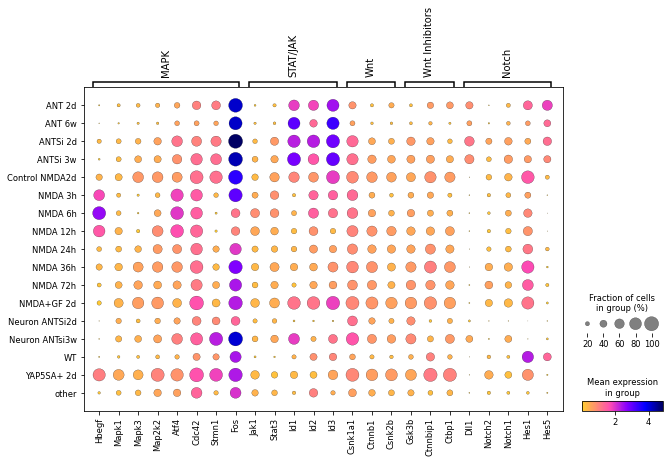

In [56]:
markers = {'MAPK':['Hbegf', 'Mapk1', 'Mapk3', 'Map2k2', 'Atf4',  'Cdc42', 'Stmn1', 'Fos'],  'STAT/JAK': ['Jak1', 'Stat3','Id1', 'Id2', 'Id3'], 'Wnt': ['Csnk1a1', 'Ctnnb1', 'Csnk2b'], 'Wnt Inhibitors': ['Gsk3b', 'Ctnnbip1', 'Ctbp1'], 'Notch': ['Dll1', 'Notch2', 'Notch1', 'Hes1', 'Hes5']}
sc.pl.dotplot(adata, var_names = markers, groupby = 'Treatments', cmap = mymapDot,  save = 'NEW1comboPathways')


#sc.pl.dotplot(adata, var_names = ['Jak2', 'Jak1', 'Socs3', 'Id1', 'Id2', 'Id3', 'Stat3', 'Stat1', 'Stat2', 'Ptpn2','Crebbp',  'Stam', 'Stam2', 'Irf9', 'Ep300', 'Pias2', 'Pias1', 'Pias4'], groupby = 'louvain_r0.5', cmap = mymapDot, save = 'StatPathway')
#sc.pl.dotplot(adata, var_names = ['Srf','Atf4','Fos','Cdc42','Stmn1','Rap1a', 'Rac1','Map2k1', 'Map2k2', 'Mapk1', 'Mapk3', 'Map4k4','Lamtor3','Grb2', 'Hras', 'Kras', 'Mras', 'Nras', 'Rras', 'Rras2',  'Araf', 'Raf1', 'Rap1b',  'Dusp3', 'Mapk8ip1', 'Mapk10', 'Max', 'Mapt','Myc', 'Rac3', 'Rasa2', 'Mknk2', 'Rps6ka6'], groupby = 'louvain_r0.5', cmap = mymapDot, save = 'MapkPathway')
#sc.pl.dotplot(adata, var_names = ['Dll3', 'Dll1', 'Hes5', 'Hes1', 'Psenen', 'Snw1','Notch1', 'Notch2', 'Aph1a', 'Dtx3',  'Crebbp', 'Rbpj','Lfng', 'Hey2', 'Heyl','Kat2a', 'Kat2b', 'Ep300'], groupby = 'louvain_r0.5', cmap = mymapDot, save = 'NotchPathway')
#sc.pl.dotplot(adata, var_names = ['Csnk1a1', 'Ctnnb1', 'Csnk2b',  'Csnk1e', 'Csnk2a1', 'Frat2', 'Bambi', 'Fzd5', 'Lgr4','Lrp6', 'Ruvbl1',  'Crebbp', 'Senp2', 'Apc',  'Ep300', 'Tcf7l2','Csnk2a2','Fzd3',  'Cxxc4', 'Gsk3b','Ctnnbip1', 'Ctbp1','Ctbp2', 'Ctnnd2', 'Nlk', 'Chd8', 'Cby1'], groupby = 'louvain_r0.5', cmap = mymapDot, save = 'WntPathway')

In [133]:
#Score cell cycle and visualize the effect:
cc_genes_file = '/Users/ann/Macosko_cell_cycle_genes.txt'

cc_genes = pd.read_table(cc_genes_file, delimiter='\t')
s_genes = cc_genes['S'].dropna()
g2m_genes = cc_genes['G2.M'].dropna()

s_genes_mm = [gene.lower().capitalize() for gene in s_genes]
g2m_genes_mm = [gene.lower().capitalize() for gene in g2m_genes]

s_genes_mm_ens = adata.var_names[np.in1d(adata.var_names, s_genes_mm)]
g2m_genes_mm_ens = adata.var_names[np.in1d(adata.var_names, g2m_genes_mm)]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_mm_ens, g2m_genes=g2m_genes_mm_ens)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    2090 total control genes are used. (0:00:05)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    2084 total control genes are used. (0:00:03)
-->     'phase', cell cycle phase (adata.obs)


/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


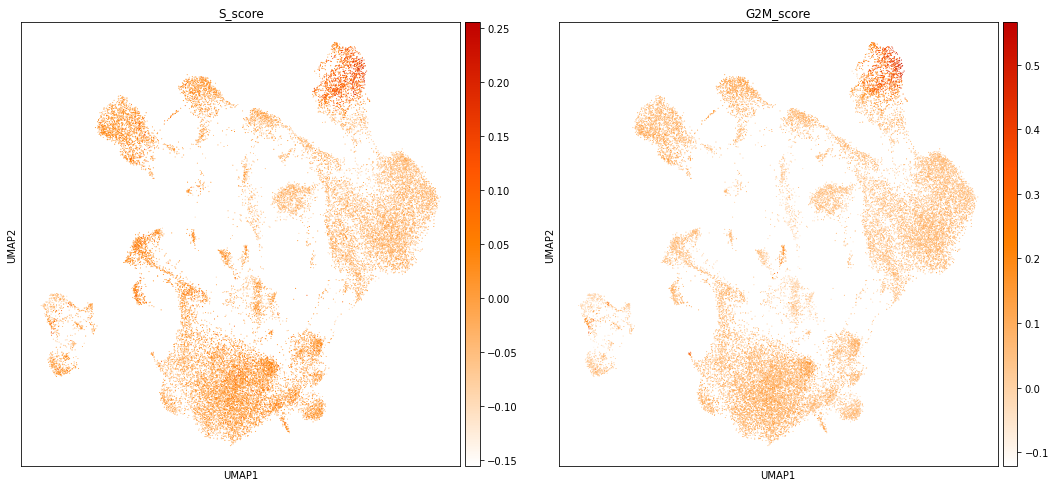

/Users/ann/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  string_cols = [


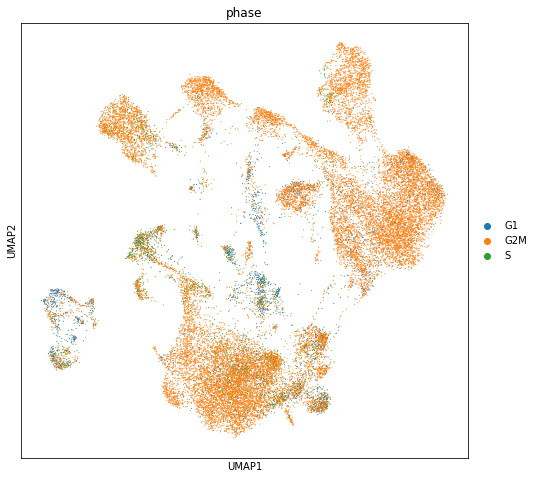

In [147]:
#plot the cell cycle scores
sc.pl.umap(adata, color=['S_score', 'G2M_score'], cmap = mymapCC, use_raw=False, save = 'S_G2M_scores_umap.pdf')
sc.pl.umap(adata, color='phase',cmap = mymapCC, use_raw=False, save = 'phase_umap.pdf')